# ACLED Dataset Wrangling and Initial Exploration - part 1

In [2]:
import pandas as pd
import os
import csv
engine='python'

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:

current_directory = os.getcwd()
print(current_directory) 

C:\Users\ntsegie\Documents\Datascience\Class_Files\ACLED\Notebooks


In [8]:
df = pd.read_csv('2019-05-01-2021-05-29-Ethiopia.csv', index_col=0)



In [7]:
df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
data_id,,,,,,,,,,,,,,,,,,,,,
7993281,231,ETH6788,6788,21 May 2021,2021,1,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,...,Jarso,9.1097,37.3727,1,Oromiya Media Network,International,"On 21 May 2021, Oromo regional special forces ...",1,1621889045,ETH
7992817,231,ETH6787,6787,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),NaN,...,Addis Ababa,9.0250,38.7469,1,BBC News,International,"On 21 May 2021, protesters gathered in Addis A...",0,1621889044,ETH
7993003,231,ETH6785,6785,20 May 2021,2021,1,Protests,Excessive force against protesters,Protesters (Ethiopia),Students (Ethiopia),...,Mer Awi,11.4167,37.1667,2,Deutsche Welle,International,"On 20 May 2021, police forces clashed with dem...",4,1621889044,ETH
7993825,231,ETH6786,6786,20 May 2021,2021,1,Battles,Armed clash,Afar Ethnic Militia (Ethiopia),NaN,...,Shinile,9.6881,41.8447,2,Voss TV,Subnational,"On 20 May 2021, Afar militias attacked a Somal...",6,1621889046,ETH
7993278,231,ETH6784,6784,19 May 2021,2021,1,Violence against civilians,Attack,Military Forces of Ethiopia (2018-),NaN,...,Senbete,10.3069,39.9885,2,Oromiya Media Network,International,"On 19 May 2021, military forces in Jille Dumug...",1,1621889045,ETH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675911,231,ETH5183,5183,02 May 2019,2019,1,Protests,Peaceful protest,Protesters (Ethiopia),Amhara Ethnic Group (Ethiopia),...,Bahir Dar,11.6000,37.3833,1,ESAT,International,"02 May: In Amhara region, Bahir Dar city peopl...",0,1618530117,ETH
7675181,231,ETH5248,5248,02 May 2019,2019,1,Violence against civilians,Attack,Amhara Ethnic Militia (Ethiopia),NaN,...,Injibara,11.0000,36.9167,2,Addis Standard; Twitter,New media-National,02 May: An Amhara ethnic militia attacked Gumu...,36,1618530125,ETH
7771530,231,ETH5247,5247,02 May 2019,2019,1,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Liyu Police,NaN,...,Fideli,9.9711,41.3323,2,Addis Standard,National,02 May: Liyu forces killed 11 pastoralists in ...,5,1618530125,ETH


In [37]:
# see basic stat of the dataset
df.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,1.585000e+03,1585.0,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1.585000e+03
mean,7.757922e+06,231.0,5994.938170,2020.296530,1.796845,2.812618,3.340694,26.611987,11.248134,38.602882,1.608833,4.145110,1.618339e+09
std,8.588846e+04,0.0,459.188271,0.698407,0.934936,2.123306,2.415233,18.883454,2.671187,1.791155,0.513379,22.710305,1.189352e+06
min,7.454391e+06,231.0,5182.000000,2019.000000,1.000000,1.000000,0.000000,10.000000,3.539100,33.218700,1.000000,0.000000,1.610410e+09
25%,7.676140e+06,231.0,5599.000000,2020.000000,1.000000,1.000000,1.000000,13.000000,9.183300,37.560700,1.000000,0.000000,1.618489e+09
50%,7.786829e+06,231.0,5996.000000,2020.000000,1.000000,1.000000,3.000000,15.000000,11.600000,38.866700,2.000000,0.000000,1.618494e+09
75%,7.792684e+06,231.0,6392.000000,2021.000000,3.000000,5.000000,5.000000,44.000000,13.700000,39.500000,2.000000,1.000000,1.618530e+09
max,7.993834e+06,231.0,6788.000000,2021.000000,3.000000,8.000000,8.000000,80.000000,14.695300,45.340800,3.000000,600.000000,1.621889e+09


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           1585 non-null   int64  
 1   iso               1585 non-null   int64  
 2   event_id_cnty     1585 non-null   object 
 3   event_id_no_cnty  1585 non-null   int64  
 4   event_date        1585 non-null   object 
 5   year              1585 non-null   int64  
 6   time_precision    1585 non-null   int64  
 7   event_type        1585 non-null   object 
 8   sub_event_type    1585 non-null   object 
 9   actor1            1585 non-null   object 
 10  assoc_actor_1     792 non-null    object 
 11  inter1            1585 non-null   int64  
 12  actor2            1362 non-null   object 
 13  assoc_actor_2     846 non-null    object 
 14  inter2            1585 non-null   int64  
 15  interaction       1585 non-null   int64  
 16  region            1585 non-null   object 


In [41]:
# displaying all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [42]:
# displaying first five rows of the dataset
df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7993281,231,ETH6788,6788,21 May 2021,2021,1,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),Students (Ethiopia),7,17,Eastern Africa,Ethiopia,Oromia,West Shewa,Cheliya,Jarso,9.1097,37.3727,1,Oromiya Media Network,International,"On 21 May 2021, Oromo regional special forces ...",1,1621889045,ETH
1,7992817,231,ETH6787,6787,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),NaN,6,NaN,NaN,0,60,Eastern Africa,Ethiopia,Addis Ababa,Region 14,Lideta,Addis Ababa,9.0250,38.7469,1,BBC News,International,"On 21 May 2021, protesters gathered in Addis A...",0,1621889044,ETH
2,7993003,231,ETH6785,6785,20 May 2021,2021,1,Protests,Excessive force against protesters,Protesters (Ethiopia),Students (Ethiopia),6,Police Forces of Ethiopia (2018-),NaN,1,16,Eastern Africa,Ethiopia,Amhara,West Gojam,Marawi Town,Mer Awi,11.4167,37.1667,2,Deutsche Welle,International,"On 20 May 2021, police forces clashed with dem...",4,1621889044,ETH
3,7993825,231,ETH6786,6786,20 May 2021,2021,1,Battles,Armed clash,Afar Ethnic Militia (Ethiopia),NaN,4,Somali Ethnic Militia (Ethiopia),NaN,4,44,Eastern Africa,Ethiopia,Somali,Siti,Shinile,Shinile,9.6881,41.8447,2,Voss TV,Subnational,"On 20 May 2021, Afar militias attacked a Somal...",6,1621889046,ETH
4,7993278,231,ETH6784,6784,19 May 2021,2021,1,Violence against civilians,Attack,Military Forces of Ethiopia (2018-),NaN,1,Civilians (Ethiopia),Pastoralists (Ethiopia),7,17,Eastern Africa,Ethiopia,Amhara,Oromia,Jilye Tumuga,Senbete,10.3069,39.9885,2,Oromiya Media Network,International,"On 19 May 2021, military forces in Jille Dumug...",1,1621889045,ETH


In [45]:
# Total number of rows and columns
df.shape



(1585, 31)

In [50]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape


(0, 31)

In [51]:
df.count() 

data_id             1585
iso                 1585
event_id_cnty       1585
event_id_no_cnty    1585
event_date          1585
year                1585
time_precision      1585
event_type          1585
sub_event_type      1585
actor1              1585
assoc_actor_1        792
inter1              1585
actor2              1362
assoc_actor_2        846
inter2              1585
interaction         1585
region              1585
country             1585
admin1              1585
admin2              1585
admin3              1585
location            1585
latitude            1585
longitude           1585
geo_precision       1585
source              1585
source_scale        1585
notes               1585
fatalities          1585
timestamp           1585
iso3                1585
dtype: int64

In [52]:
# dropping duplicates in the dataset
df = df.drop_duplicates()
df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7993281,231,ETH6788,6788,21 May 2021,2021,1,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),Students (Ethiopia),7,17,Eastern Africa,Ethiopia,Oromia,West Shewa,Cheliya,Jarso,9.1097,37.3727,1,Oromiya Media Network,International,"On 21 May 2021, Oromo regional special forces ...",1,1621889045,ETH
1,7992817,231,ETH6787,6787,21 May 2021,2021,1,Protests,Peaceful protest,Protesters (Ethiopia),NaN,6,NaN,NaN,0,60,Eastern Africa,Ethiopia,Addis Ababa,Region 14,Lideta,Addis Ababa,9.0250,38.7469,1,BBC News,International,"On 21 May 2021, protesters gathered in Addis A...",0,1621889044,ETH
2,7993003,231,ETH6785,6785,20 May 2021,2021,1,Protests,Excessive force against protesters,Protesters (Ethiopia),Students (Ethiopia),6,Police Forces of Ethiopia (2018-),NaN,1,16,Eastern Africa,Ethiopia,Amhara,West Gojam,Marawi Town,Mer Awi,11.4167,37.1667,2,Deutsche Welle,International,"On 20 May 2021, police forces clashed with dem...",4,1621889044,ETH
3,7993825,231,ETH6786,6786,20 May 2021,2021,1,Battles,Armed clash,Afar Ethnic Militia (Ethiopia),NaN,4,Somali Ethnic Militia (Ethiopia),NaN,4,44,Eastern Africa,Ethiopia,Somali,Siti,Shinile,Shinile,9.6881,41.8447,2,Voss TV,Subnational,"On 20 May 2021, Afar militias attacked a Somal...",6,1621889046,ETH
4,7993278,231,ETH6784,6784,19 May 2021,2021,1,Violence against civilians,Attack,Military Forces of Ethiopia (2018-),NaN,1,Civilians (Ethiopia),Pastoralists (Ethiopia),7,17,Eastern Africa,Ethiopia,Amhara,Oromia,Jilye Tumuga,Senbete,10.3069,39.9885,2,Oromiya Media Network,International,"On 19 May 2021, military forces in Jille Dumug...",1,1621889045,ETH


In [53]:
df.count()

data_id             1585
iso                 1585
event_id_cnty       1585
event_id_no_cnty    1585
event_date          1585
year                1585
time_precision      1585
event_type          1585
sub_event_type      1585
actor1              1585
assoc_actor_1        792
inter1              1585
actor2              1362
assoc_actor_2        846
inter2              1585
interaction         1585
region              1585
country             1585
admin1              1585
admin2              1585
admin3              1585
location            1585
latitude            1585
longitude           1585
geo_precision       1585
source              1585
source_scale        1585
notes               1585
fatalities          1585
timestamp           1585
iso3                1585
dtype: int64

In [64]:

null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [54]:
print(df.isnull().sum())

data_id               0
iso                   0
event_id_cnty         0
event_id_no_cnty      0
event_date            0
year                  0
time_precision        0
event_type            0
sub_event_type        0
actor1                0
assoc_actor_1       793
inter1                0
actor2              223
assoc_actor_2       739
inter2                0
interaction           0
region                0
country               0
admin1                0
admin2                0
admin3                0
location              0
latitude              0
longitude             0
geo_precision         0
source                0
source_scale          0
notes                 0
fatalities            0
timestamp             0
iso3                  0
dtype: int64


In [55]:
df = df.dropna() 
df.count()

data_id             586
iso                 586
event_id_cnty       586
event_id_no_cnty    586
event_date          586
year                586
time_precision      586
event_type          586
sub_event_type      586
actor1              586
assoc_actor_1       586
inter1              586
actor2              586
assoc_actor_2       586
inter2              586
interaction         586
region              586
country             586
admin1              586
admin2              586
admin3              586
location            586
latitude            586
longitude           586
geo_precision       586
source              586
source_scale        586
notes               586
fatalities          586
timestamp           586
iso3                586
dtype: int64

In [56]:
print(df.isnull().sum()) 

data_id             0
iso                 0
event_id_cnty       0
event_id_no_cnty    0
event_date          0
year                0
time_precision      0
event_type          0
sub_event_type      0
actor1              0
assoc_actor_1       0
inter1              0
actor2              0
assoc_actor_2       0
inter2              0
interaction         0
region              0
country             0
admin1              0
admin2              0
admin3              0
location            0
latitude            0
longitude           0
geo_precision       0
source              0
source_scale        0
notes               0
fatalities          0
timestamp           0
iso3                0
dtype: int64


In [65]:
df.count()

data_id             586
iso                 586
event_id_cnty       586
event_id_no_cnty    586
event_date          586
year                586
time_precision      586
event_type          586
sub_event_type      586
actor1              586
assoc_actor_1       586
inter1              586
actor2              586
assoc_actor_2       586
inter2              586
interaction         586
region              586
country             586
admin1              586
admin2              586
admin3              586
location            586
latitude            586
longitude           586
geo_precision       586
source              586
source_scale        586
notes               586
fatalities          586
timestamp           586
iso3                586
dtype: int64

In [43]:
#selecting columns that are relevant to the project

df_filter = df[['country','event_type', 'event_date', 'year', 'region', 'sub_event_type', 'source', 'fatalities','notes']]
df_filter

,country,event_type,event_date,year,region,sub_event_type,source,fatalities,notes
data_id,,,,,,,,,
7993281,Ethiopia,Violence against civilians,21 May 2021,2021,Eastern Africa,Attack,Oromiya Media Network,1,"On 21 May 2021, Oromo regional special forces ..."
7992817,Ethiopia,Protests,21 May 2021,2021,Eastern Africa,Peaceful protest,BBC News,0,"On 21 May 2021, protesters gathered in Addis A..."
7993003,Ethiopia,Protests,20 May 2021,2021,Eastern Africa,Excessive force against protesters,Deutsche Welle,4,"On 20 May 2021, police forces clashed with dem..."
7993825,Ethiopia,Battles,20 May 2021,2021,Eastern Africa,Armed clash,Voss TV,6,"On 20 May 2021, Afar militias attacked a Somal..."
7993278,Ethiopia,Violence against civilians,19 May 2021,2021,Eastern Africa,Attack,Oromiya Media Network,1,"On 19 May 2021, military forces in Jille Dumug..."
...,...,...,...,...,...,...,...,...,...
7675911,Ethiopia,Protests,02 May 2019,2019,Eastern Africa,Peaceful protest,ESAT,0,"02 May: In Amhara region, Bahir Dar city peopl..."
7675181,Ethiopia,Violence against civilians,02 May 2019,2019,Eastern Africa,Attack,Addis Standard; Twitter,36,02 May: An Amhara ethnic militia attacked Gumu...
7771530,Ethiopia,Violence against civilians,02 May 2019,2019,Eastern Africa,Attack,Addis Standard,5,02 May: Liyu forces killed 11 pastoralists in ...


In [48]:
#counting the amount of fatalities per event type
df_filter.groupby(['event_type'])['fatalities'].count()

event_type
Battles                       815
Explosions/Remote violence     41
Protests                      264
Riots                         111
Strategic developments         37
Violence against civilians    317
Name: fatalities, dtype: int64

In [53]:
#counting the amount of fatalities reported by a source for an event taht happened the same day
df_filter.groupby(['source','event_date' ])['fatalities'].count().to_frame().sort_values(by='event_date')

,,fatalities
source,event_date,
Daily Nation (Kenya),01 April 2020,2
Undisclosed Source,01 April 2021,1
BBC News,01 August 2020,1
Oromiya Media Network,01 August 2020,1
AFP,01 December 2020,1
...,...,...
VOA,31 July 2020,1
BBC News,31 March 2021,3
VOA,31 May 2019,2


In [29]:
unique_events_sub = pd.unique(df[['event_type', 'sub_event_type']].values.ravel())
len(unique_events_sub)


28

In [42]:
#sorted list of event and subevents
no_dup_events = df[['event_type', 'sub_event_type']].drop_duplicates()
no_dup_events.sort_values(by='event_type')

,event_type,sub_event_type
data_id,,
7993825,Battles,Armed clash
7917705,Battles,Government regains territory
7927422,Battles,Non-state actor overtakes territory
7992884,Explosions/Remote violence,Grenade
7793514,Explosions/Remote violence,Air/drone strike
7791915,Explosions/Remote violence,Remote explosive/landmine/IED
7676006,Explosions/Remote violence,Suicide bomb
7992818,Explosions/Remote violence,Shelling/artillery/missile attack
7993003,Protests,Excessive force against protesters


In [33]:
unique_events_sub.to_frame()

AttributeError: 'numpy.ndarray' object has no attribute 'to_frame'

<AxesSubplot:xlabel='fatalities'>

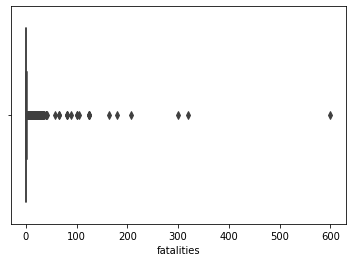

In [13]:
#detecting outliers

sns.boxplot(x=df['fatalities'])

In [44]:

# Position of the Outlier
print(np.where(df['fatalities']>300))

(array([  18, 1042], dtype=int64),)


In [88]:
#sort_data = np.sort(df)

#calculate interquartile range of values in the 'fatalities' column
Q3, Q1 = np.percentile(df['fatalities'], [75 ,25])
iqr = Q3 - Q1

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q3)

IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  1.0
Interquartile range is 1.0


In [89]:
#finding the upper and lower limit of the df

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -1.5
up_limit is 2.5


In [46]:
#define function to calculate interquartile range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

#calculate IQR for 'fatalities' and 'time_precision' columns
df[['fatalities', 'time_precision']].apply(find_iqr)




fatalities        1.0
time_precision    2.0
dtype: float64

In [47]:

#calculate IQR for all columns
#df.apply(find_iqr)

In [99]:
#detecting outliers

outlier =[]
for x in df:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'